# **EDA Addition JL**

## Objectives

This performs exploratory data analysis (EDA) on the processed movie dataset to:

1. Test key hypotheses about factors influencing movie success
2. Identify statistically significant relationships between budget, revenue, ROI, ratings, and language
3. Create visualisations that communicate insights effectively
4. Provide actionable insights for stakeholders and dashboard development

Key hypothses focus for this section:
- Movie Success factors in correlation to Budget, Revenue, ROI, Ratings, and Language

## Inputs

* Data/PROCESSED/movies_ready_for_EDA.csv (cleand procssed datset from ETL stage)
* Features: Budget, Revenue, ROI, Popularity, Vote_average, Original_language

## Outputs

* Statistical test results with interpretations for each hypothesis
* Visualisations (scatter plots, box plots, heatmaps, bar charts)
* Key Summary insights 

## Research Hypotheses

**H3:** Movie success is influenced by Budget

**H5:** English-language movies get higher ratings

**Additional Exploratory Analyses:**
- ROI variation across different budget levels
- Multi-feature correlation patterns



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\HACK_2\\Team1_TMDb_Hackathon_2\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\HACK_2\\Team1_TMDb_Hackathon_2'


---
# Section 1: Load Data and Check

**Import Libraries and Load daframe and Basic Checks**

- Verify file loads correctly and is as expected (columns, rows)
- then load headers and first few rows to see it all looks as should

Section 1 content

In [4]:
# =============================================================================
# Load Libraries and dataset for EDA and check basic structure
# =============================================================================
# Import Data analysis and visualisation libraries for EDA
# Libraries for numerical operations and data manipulation
import numpy as np # for numerical operations
import pandas as pd # for data manipulation

# Libraries for Viisualition
import matplotlib.pyplot as plt # for basic plotting
import seaborn as sns # for enhanced visualisations
import plotly.express as px # for interactive visualisations
import plotly.graph_objects as go # for advanced interactive visualisations


# Libraries for statistical analysis
from scipy import stats # Statistical libraries
from scipy.stats import chi2_contingency # Chi-squared test
from scipy.stats import pearsonr # Pearson correlation
from scipy.stats import ttest_ind # T-test


# Load processed dataset (output from 100k 01_ETL.ipynb) and check structure
df = pd.read_csv("Data/PROCESSED/movies_ready_for_EDA.csv")

df.shape # display the shape of the dataframe

(4803, 35)

In [5]:
df.head() # display the first 5 rows of the dataframe to check data loaded correctly

,Budget,Genres,Homepage,Id,Keywords,Original_language,Original_title,Overview,Popularity,Production_companies,...,Missing_Status,Runtime_Flag,Has_homepage,Has_overview,Has_tagline,ROI,Log_budget,Log_revenue,Decade,Runtime_bucket
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Complete,Normal,1,1,1,11.763566,19.283571,21.748578,2000.0,epic
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Complete,Normal,1,1,1,3.203333,19.519293,20.683485,2000.0,epic
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Complete,Normal,1,1,1,3.594590,19.316769,20.596199,2010.0,very_long
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Complete,Normal,1,1,1,4.339756,19.336971,20.804790,2010.0,epic
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Complete,Normal,1,1,1,1.092843,19.376192,19.464974,2010.0,very_long


---

# Data Overview and Initial Exploration

Intial exploration to better understand structure and basic characteristics of the dataset.

In [6]:
# =============================================================================
# Initial exploration to better understand structure and basic characteristics 
# of the dataset.
# key features available and summary statistics
# =============================================================================

print("Key features available:")
print(pd.DataFrame(df.columns, columns=['Column Name']))


Key features available:
             Column Name
0                 Budget
1                 Genres
2               Homepage
3                     Id
4               Keywords
5      Original_language
6         Original_title
7               Overview
8             Popularity
9   Production_companies
10  Production_countries
11          Release_date
12               Revenue
13               Runtime
14      Spoken_languages
15                Status
16               Tagline
17               Title_x
18          Vote_average
19            Vote_count
20      Has_release_date
21          Release_year
22                  Cast
23                  Crew
24                Profit
25        Missing_Status
26          Runtime_Flag
27          Has_homepage
28          Has_overview
29           Has_tagline
30                   ROI
31            Log_budget
32           Log_revenue
33                Decade
34        Runtime_bucket


In [7]:
# Summary statistics for all columns in the dataframe

df.describe(include='all')

,Budget,Genres,Homepage,Id,Keywords,Original_language,Original_title,Overview,Popularity,Production_companies,...,Missing_Status,Runtime_Flag,Has_homepage,Has_overview,Has_tagline,ROI,Log_budget,Log_revenue,Decade,Runtime_bucket
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,...,4803,4803,4803.000000,4803.000000,4803.000000,3.766000e+03,4803.000000,4803.000000,4802.000000,4803
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,...,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",NaN,[],...,Complete,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,...,3229,4654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1936
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,...,NaN,NaN,0.356444,0.999375,0.824276,2.533490e+03,13.001826,12.220768,1998.063307,NaN
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,...,NaN,NaN,0.478998,0.024987,0.380624,1.394602e+05,7.040815,8.157087,12.843804,NaN
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1910.000000,NaN
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,...,NaN,NaN,0.000000,1.000000,1.000000,4.909786e-01,13.579709,0.000000,1990.000000,NaN
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,...,NaN,NaN,0.000000,1.000000,1.000000,1.867533e+00,16.523561,16.768857,2000.000000,NaN
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,...,NaN,NaN,1.000000,1.000000,1.000000,3.941424e+00,17.504390,18.347219,2010.000000,NaN


---
# HYPOTHESIS H3: Movie Success is Influenced by Budget

**Research Question:** Do movies with higher budgets generate more revenue?

**Statistical Approach:** Pearson correlation coefficient
- Measures linear relationship strength between two continuous variables
- Tests whether budget and revenue move together systematically

In [8]:
# =============================================================================
# DEBUG: Check data before Pearson test
# =============================================================================
print("Checking data state...")
print(f"DataFrame shape: {df.shape}")
print(f"Budget column exists: {'Budget' in df.columns}")
print(f"Revenue column exists: {'Revenue' in df.columns}")
print(f"Budget non-null count: {df['Budget'].notna().sum()}")
print(f"Revenue non-null count: {df['Revenue'].notna().sum()}")


Checking data state...
DataFrame shape: (4803, 35)
Budget column exists: True
Revenue column exists: True
Budget non-null count: 4803
Revenue non-null count: 4803


In [9]:
# =============================================================================
# H3: Test Relationship Between Budget and Movie Success (Revenue)
# =============================================================================
# Hypothesis:
#   H0 (null): Budget and revenue have no linear relationship
#   H1 (alt):  Budget and revenue are linearly correlated
#
# Test type: Pearson correlation (measures linear association)
# Suitable for: Two continuous variables (e.g., budget, revenue)
# -----------------------------------------------------------------------------

# Drop rows with missing or invalid numeric data
df_test_P = df[["Budget", "Revenue"]].dropna()

# Perform Pearson correlation test
r_H3, p_H3 = pearsonr(df_test_P["Budget"], df_test_P["Revenue"])

# =============================================================================
# Display results and interpret
# =============================================================================
print("───────────────────────────────────────────────")
print(" Pearson Correlation Test: Budget vs Revenue")
print("───────────────────────────────────────────────")
print(f"Sample size: {len(df_test_P)} movies with valid Budget and Revenue data")
print(f"Correlation coefficient (r): {r_H3:.3f}")
print(f"P-value: {p_H3:.4f}")

# Simple interpretation
if p_H3 < 0.05:
    print("\nResult: Statistically significant (p < 0.05)")
    print("Interpretation: There is evidence of a linear relationship —")
    print("movies with higher budgets tend to have higher revenues.")
else:
    print("\nResult: Not statistically significant (p ≥ 0.05)")
    print("Interpretation: No evidence of a linear relationship.")
    
# Optional: effect strength classification (Cohen's guidelines)
if abs(r_H3) < 0.3:
    strength = "weak"
elif abs(r_H3) < 0.5:
    strength = "moderate"
else:
    strength = "strong"
    
print(f"Effect size: {strength} correlation (r = {r_H3:.3f})")
print("───────────────────────────────────────────────")

───────────────────────────────────────────────
 Pearson Correlation Test: Budget vs Revenue
───────────────────────────────────────────────
Sample size: 4803 movies with valid Budget and Revenue data
Correlation coefficient (r): 0.731
P-value: 0.0000

Result: Statistically significant (p < 0.05)
Interpretation: There is evidence of a linear relationship —
movies with higher budgets tend to have higher revenues.
Effect size: strong correlation (r = 0.731)
───────────────────────────────────────────────


**- Visualisation:** 
- Seaborn with Matplotlib chosen for combined scatter plot and linear regression line, which shows the relationship strength and allows easy overlay of trend analysis

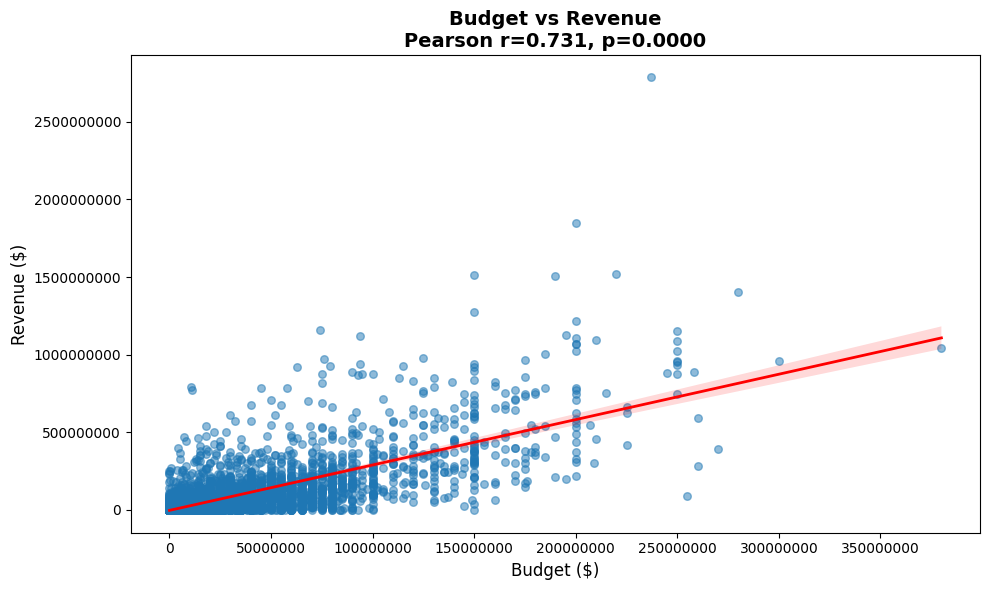

In [10]:
# =============================================================================
# H3: Display Regression Plot: Budget vs Revenue (Seaborn and Matplotlib)
# ============================================================================
# Create figure
plt.figure(figsize=(10, 6))

# Regression plot with confidence interval
sns.regplot(
    x='Budget', 
    y='Revenue', 
    data=df_test_P,
    scatter_kws={'alpha': 0.5, 's': 30},  # Semi-transparent dots
    line_kws={'color': 'red', 'linewidth': 2}  # Red trend line
)

# Add title and labels
plt.title(f'Budget vs Revenue\nPearson r={r_H3:.3f}, p={p_H3:.4f}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Budget ($)', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)

# Format axes with commas
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='both')

plt.tight_layout()
plt.show()

## Interpretation: Budget and Revenue Relationship

**Key Finding:** Strong positive correlation (r = 0.73, p < 0.001)

**What this means:**
- Movies with higher budgets tend to generate significantly higher revenues
- The relationship is strong and statistically significant
- Budget explains approximately 53% of revenue variance (r² = 0.53)

**Important Note:**
- You cannot from this interpret correlation as equaling causation (i.e high budget doesn't guarantee high revenue)
    - Outliers exist: Some low-budget films are highly profitable; some blockbusters flop
    - Other factors will matter too (for example marketing, cast, genre, and timing)

---

# H3 Related Further Exploratory Analysis:

**H3 Addition 1 - ROI Variation by Budget Level**
- Research Question:
- Does Return on Investment differ across budget quartiles?

**Statistical Approach:** Kruskal-Wallis H-test
- Non-parametric test comparing medians across multiple groups
- Suitable for non-normally distributed data (like ROI)

In [11]:
# =============================================================================
## =============================================================================
# H3: Test Relationship Between Budget and Movie Success (ROI)
# =============================================================================
# Hypothesis:
#   H0 (null): Median ROI is the same across all budget levels
#   H1 (alt):  At least one budget group differs in median ROI
#
# Test type: Kruskal–Wallis H-test (non-parametric ANOVA)
# Suitable for: Comparing medians of multiple independent groups
# -----------------------------------------------------------------------------

import scipy.stats as stats
import pandas as pd

df_valid = df.dropna(subset=["ROI", "Budget"]).copy()
# Divide movies into 4 equal-sized budget groups (quartiles)
df_valid["Budget_group"] = pd.qcut(df_valid["Budget"], 4, labels=["Low", "Mid-Low", "Mid-High", "High"])

# Group ROI values by budget quartile
groups = [group["ROI"].values for _, group in df_valid.groupby("Budget_group", observed=True)]

# Perform Kruskal–Wallis test
statistic, p_value = stats.kruskal(*groups)

# =============================================================================
# Display results and interpretation
# =============================================================================
print("───────────────────────────────────────────────")
print(" Kruskal–Wallis Test: ROI Differences by Budget Group")
print("───────────────────────────────────────────────")
print(f"Test statistic (H): {statistic:.3f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("\nResult: Statistically significant (p < 0.05)")
    print("Interpretation: At least one budget group has a different median ROI.")
    print("Movies with different budget sizes tend to yield different returns on investment.")
else:
    print("\nResult: Not statistically significant (p ≥ 0.05)")
    print("Interpretation: No evidence that ROI differs by budget group.")

group_medians = df_valid.groupby("Budget_group", observed=True)["ROI"].median()
print("\nMedian ROI by Budget Group:")
print(group_medians)

print("───────────────────────────────────────────────")


───────────────────────────────────────────────
 Kruskal–Wallis Test: ROI Differences by Budget Group
───────────────────────────────────────────────
Test statistic (H): 21.302
P-value: 0.000091

Result: Statistically significant (p < 0.05)
Interpretation: At least one budget group has a different median ROI.
Movies with different budget sizes tend to yield different returns on investment.

Median ROI by Budget Group:
Budget_group
Low         1.500000
Mid-Low     1.725697
Mid-High    1.718920
High        2.169437
Name: ROI, dtype: float64
───────────────────────────────────────────────


**Visualisation:**
- Seaborn boxplo with Matplotlib log scale 
- chosen to handle extreme outliers in ROI data while preserving visibility of median and quartiles across budget groups

C:\Users\JayneLawley\AppData\Local\Temp\ipykernel_27448\4111886581.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Budget_group", y="ROI", data=df_valid, palette="pastel")


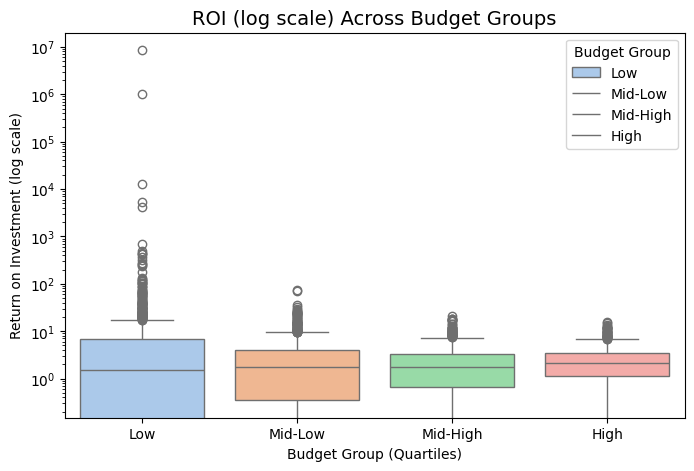

In [12]:
# =============================================================================
# Visualisation of ROI Across Budget Groups (Boxplot with Log Scale Seaborn 
# and Matplotlib)
# =============================================================================
# Make sure to drop missing values for Budget
df_valid = df.dropna(subset=["ROI", "Budget"]).copy()

# Create Budget_group column (quartiles)
df_valid["Budget_group"] = pd.qcut(df_valid["Budget"], 4, labels=["Low", "Mid-Low", "Mid-High", "High"])

plt.figure(figsize=(8,5))
sns.boxplot(x="Budget_group", y="ROI", data=df_valid, palette="pastel")
plt.yscale("log")  # Apply log scale to y-axis
plt.title("ROI (log scale) Across Budget Groups", fontsize=14)
plt.xlabel("Budget Group (Quartiles)")
plt.ylabel("Return on Investment (log scale)")
plt.legend(title="Budget Group", labels=["Low", "Mid-Low", "Mid-High", "High"])
plt.show()

## Interpretation: ROI Across Budget Groups

**Key Finding:** Significant difference in ROI across budget levels (H = 21.30, p < 0.001)

**What this means:**
- High-budget films show highest median ROI (2.17x return)
- Low-budget films show lowest median ROI (1.50x return)
- Investing more tends to yield better returns relative to investment

**Business Insight:**
- Higher budgets enable better production quality, marketing, and distribution
- The investment risk is offset by proportionally higher returns
- However, outliers exist (some low-budget films become surprise hits)

**Visualisation:**
- Seaborn boxplo with Matplotlib
- Trimmed to 99th percentile to show typical ROI distribution without extreme outliers, enabling clearer comparison across budget levels

C:\Users\JayneLawley\AppData\Local\Temp\ipykernel_27448\2112700445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Budget_group", y="ROI", data=df_trimmed, palette="pastel")


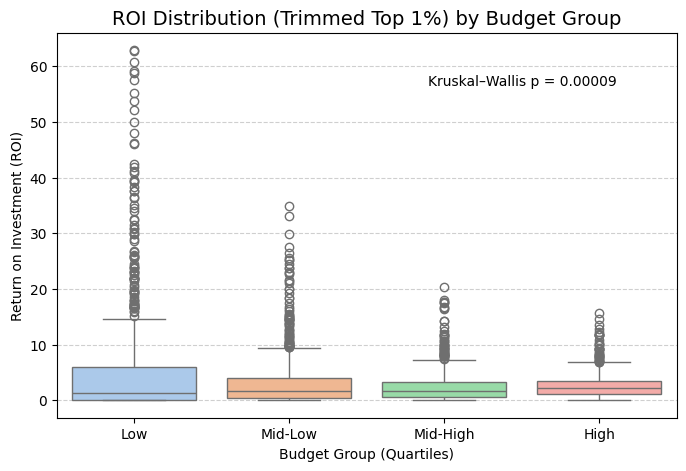

In [13]:

# =============================================================================
# Visualisation of ROI Across Budget Groups (Boxplot without Log Scale
# Seaborn and Matplotlib)
# =============================================================================
roi_cap = df_valid["ROI"].quantile(0.99)
df_trimmed = df_valid[df_valid["ROI"] <= roi_cap].dropna(subset=["Budget_group", "ROI"])

plt.figure(figsize=(8,5))
sns.boxplot(x="Budget_group", y="ROI", data=df_trimmed, palette="pastel")
plt.title("ROI Distribution (Trimmed Top 1%) by Budget Group", fontsize=14)
plt.xlabel("Budget Group (Quartiles)")
plt.ylabel("Return on Investment (ROI)")
plt.text(2.5, df_trimmed["ROI"].max()*0.9, f"Kruskal–Wallis p = {p_value:.5f}", ha="center")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

**H3 Addition 2 - Multi-Feature Correlation**

**Objective:** Understand how Budget, Revenue, ROI, Popularity, and Vote_average relate to each other

**Strong Positive Correlations:**
- Budget and Revenue: High budgets lead to high revenues
- Popularity and Vote_average: Popular movies tend to be well-rated

**Weak or Negative Correlations:**
- ROI shows weaker correlation with other metrics
- This suggests profitability isn't solely driven by size or ratings

**Actionable Insights:**
- Budget is the strongest predictor of revenue
- Quality (ratings) and popularity move together
- ROI requires balancing investment with market appeal

**Visualisation:**
- Plotly Heatmap
- Chosen for interactivity (hover to see exact correlation values) - supports stakeholder exploration.

In [14]:
# =============================================================================
# Visualisation of Correlation Matrix (Plotly Heatmap)
# Correlation Matrix Budget, Revenue, ROI, Popularity, Vote_average
# =============================================================================
# Select relevant columns and compute correlation matrix
cols = ['Budget', 'Revenue', 'ROI', 'Popularity', 'Vote_average']
corr_matrix = df[cols].corr()

# Create Plotly heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale='Inferno',
        colorbar=dict(title='Correlation'),
        zmin=-1, zmax=1,
        text=corr_matrix.round(2).astype(str),
        hoverinfo='text'
    )
)

fig.update_layout(
    title='Correlation Heatmap: Budget, Revenue, ROI, Popularity, Vote_average',
    xaxis_title='Features',
    yaxis_title='Features',
    width=700,
    height=600
)

fig.show()

**H3 Addition 3: Budget vs Revenue: Identifying Outliers**

| Rank | Budget | Revenue    | ROI        |
|------|--------|------------|------------|
| 1    | 1      | 8,500,000  | 8,500,000.00 |
| 2    | 10     | 10,000,000 | 1,000,000.00 |
| 3    | 15,000 | 193,355,800| 12,890.39    |
| 4    | 218    | 1,162,014  | 5,330.34     |
| 5    | 60,000 | 248,000,000| 4,133.33     |

**Visualisation:**
- Matplotlib scatterplot showing relationship between Budget and Revenue, with points colour-coded by ROI category (Loss, Break-even, Profitable, Highly Profitable).  
- This visualisation identifies outliers and high-performing films, revealing which combinations of budget and revenue generate the best returns on investment.

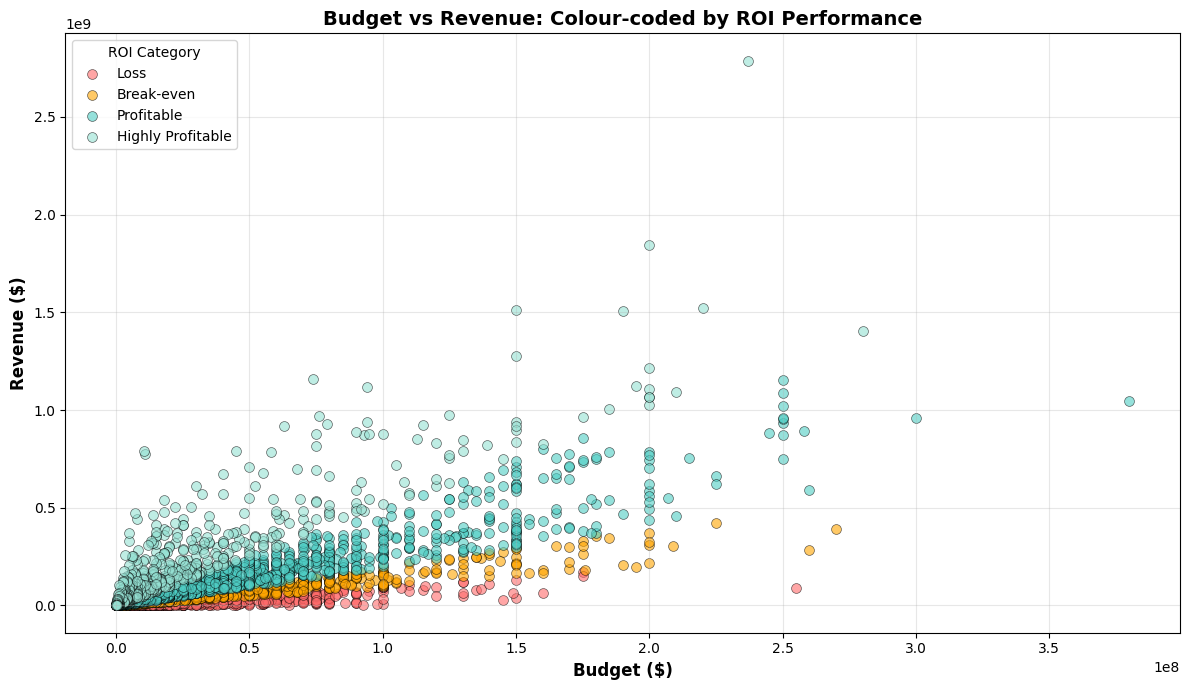


Top 5 Movies by ROI:
      Budget    Revenue         ROI
4238       1    8500000  8500000.00
3137      10   10000000  1000000.00
4577   15000  193355800    12890.39
4582     218    1162014     5330.34
4496   60000  248000000     4133.33


In [ ]:
# =============================================================================
# Visualisation of Budget vs Revenue Scatter Plot with ROI Colour-coding
# using Matplotlib
# =============================================================================
# Enhanced scatter plot with outlier highlighting
df_plot = df[['Budget', 'Revenue', 'ROI']].dropna()

# Calculate ROI-based colors
df_plot['ROI_category'] = pd.cut(df_plot['ROI'], bins=[0, 1, 2, 5, 100], labels=['Loss', 'Break-even', 'Profitable', 'Highly Profitable'])

plt.figure(figsize=(12, 7))
colors = {'Loss': '#FF6B6B', 'Break-even': '#FFA500', 'Profitable': '#4ECDC4', 'Highly Profitable': '#95E1D3'}

for category in df_plot['ROI_category'].cat.categories:
    subset = df_plot[df_plot['ROI_category'] == category]
    plt.scatter(subset['Budget'], subset['Revenue'], 
                label=category, alpha=0.6, s=50, c=colors[category], edgecolors='black', linewidth=0.5)

plt.xlabel('Budget ($)', fontsize=12, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize=12, fontweight='bold')
plt.title('Budget vs Revenue: Colour-coded by ROI Performance', fontsize=14, fontweight='bold')
plt.legend(title='ROI Category', loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# Display top performers by ROI
# =============================================================================
# Identify top performers
top_roi = df_plot.nlargest(5, 'ROI')[['Budget', 'Revenue', 'ROI']]
print("\nTop 5 Movies by ROI:")
print(top_roi.round(2))

**H3 Addition 3: Distribution of Key Success Metrics**

**Summary Statistics:**
- ROI: Median = 1.87, Mean = 2533.49
- Rating: Mean = 6.09, Std = 1.19

**Visualisation Showing:**

- Distribution of Key Success Metrics
    - Four-panel histogram grid displaying distributions of key variables: ROI, Budget (log scale), Revenue (log scale), and Vote Average (rating). 
    - Each histogram includes a reference line (median or mean) to indicate central tendency. Log scales are applied to Budget and Revenue to better visualise the right-skewed distributions typical of financial data.

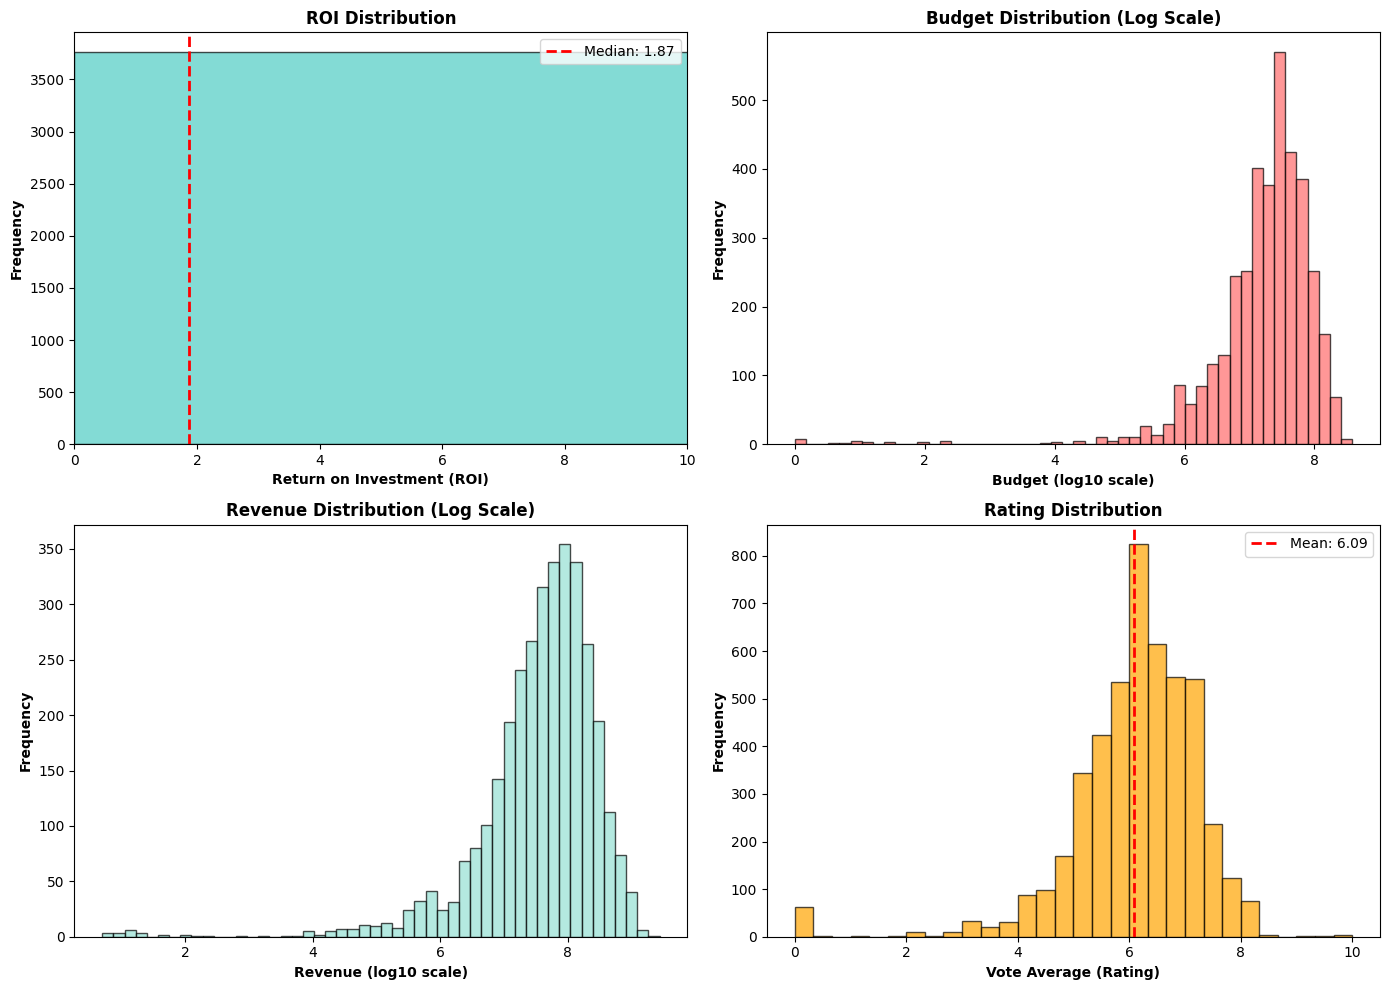

Summary Statistics:
ROI: Median = 1.87, Mean = 2533.49
Rating: Mean = 6.09, Std = 1.19


In [ ]:
# =============================================================================
# Visualisation of key success metrics distributions using Matplotlib
# =============================================================================
# Create distribution plots for key metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ROI distribution
axes[0, 0].hist(df['ROI'].dropna(), bins=50, color='#4ECDC4', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['ROI'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["ROI"].median():.2f}')
axes[0, 0].set_xlabel('Return on Investment (ROI)', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('ROI Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 10)

# Budget distribution (log scale) - filter out zero and negative values
budget_valid = df['Budget'].dropna()
budget_valid = budget_valid[budget_valid > 0]
axes[0, 1].hist(np.log10(budget_valid), bins=50, color='#FF6B6B', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Budget (log10 scale)', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].set_title('Budget Distribution (Log Scale)', fontsize=12, fontweight='bold')

# Revenue distribution (log scale) - filter out zero and negative values
revenue_valid = df['Revenue'].dropna()
revenue_valid = revenue_valid[revenue_valid > 0]
axes[1, 0].hist(np.log10(revenue_valid), bins=50, color='#95E1D3', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Revenue (log10 scale)', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title('Revenue Distribution (Log Scale)', fontsize=12, fontweight='bold')

# Vote Average distribution
axes[1, 1].hist(df['Vote_average'].dropna(), bins=30, color='#FFA500', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df['Vote_average'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Vote_average"].mean():.2f}')
axes[1, 1].set_xlabel('Vote Average (Rating)', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title('Rating Distribution', fontsize=12, fontweight='bold')
axes[1, 1].legend()

plt.tight_layout()
plt.show()
# =============================================================================
# Statistical Summary Output
# =============================================================================
print("Summary Statistics:")
print(f"ROI: Median = {df['ROI'].median():.2f}, Mean = {df['ROI'].mean():.2f}")
print(f"Rating: Mean = {df['Vote_average'].mean():.2f}, Std = {df['Vote_average'].std():.2f}")

---
# H5: English-language Movies Get Higher Ratings

**Research Question:** Do English-language movies receive different ratings than non-English movies?

**Statistical Approach:** Welch's t-test
- Compares means between two independent groups
- Doesn't assume equal variances

In [17]:
# =============================================================================
# H5: Test if English-language movies get higher ratings
# =============================================================================
# Hypothesis:
#   H0 (null): Mean vote_average is the same for English and non-English movies
#   H1 (alt): Mean vote_average differs between English and non-English movies
#
# Test type: Independent samples t-test (Welch's t-test)
# Suitable for: Comparing means of two independent groups (English vs non-English)
# -----------------------------------------------------------------------------

import pandas as pd
from scipy.stats import ttest_ind

# Drop rows with missing values in relevant columns
df_valid = df.dropna(subset=["Vote_average", "Original_language"]).copy()

# Create flag for English-language movies
df_valid['Is_english'] = df_valid['Original_language'] == 'en'

# Group vote_average values by English/non-English
english_ratings = df_valid.loc[df_valid['Is_english'], 'Vote_average']
non_english_ratings = df_valid.loc[~df_valid['Is_english'], 'Vote_average']

# Perform Welch's t-test
t_stat, p_val = ttest_ind(english_ratings, non_english_ratings, equal_var=False)

# =============================================================================
# Display results and interpretation
# =============================================================================
print("───────────────────────────────────────────────")
print(" T-Test: English vs Non-English Movie Ratings")
print("───────────────────────────────────────────────")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("\nResult: Statistically significant (p < 0.05)")
    print("Interpretation: There is evidence that English and non-English movies have different average ratings.")
else:
    print("\nResult: Not statistically significant (p ≥ 0.05)")
    print("Interpretation: No evidence that average ratings differ by language.")

mean_english = english_ratings.mean()
mean_non_english = non_english_ratings.mean()
print(f"\nMean rating (English): {mean_english:.2f}")
print(f"Mean rating (Non-English): {mean_non_english:.2f}")
print("───────────────────────────────────────────────")

───────────────────────────────────────────────
 T-Test: English vs Non-English Movie Ratings
───────────────────────────────────────────────
T-statistic: -5.664
P-value: 0.0000

Result: Statistically significant (p < 0.05)
Interpretation: There is evidence that English and non-English movies have different average ratings.

Mean rating (English): 6.07
Mean rating (Non-English): 6.49
───────────────────────────────────────────────


**Visualisation:**
- Seaborn violinplot, boxplot and stripplot with Matplotlib
- Chosen to show full distribution shape (violin) alongside quartiles (box) and individual data points (strip), enabling visual assessment of language rating differences


C:\Users\JayneLawley\AppData\Local\Temp\ipykernel_27448\1170022306.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\JayneLawley\AppData\Local\Temp\ipykernel_27448\1170022306.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




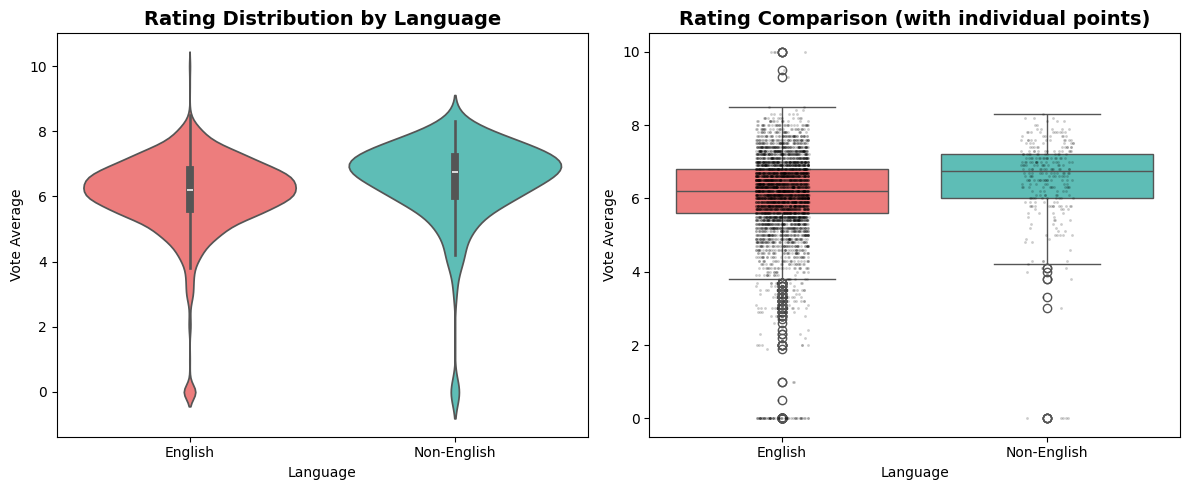


Sample sizes: English = 4505, Non-English = 298


In [18]:
# =============================================================================
# Visualisation with violin Plot and box plot Side by Side using 
# Seaborn and Matplotlib 
# =============================================================================
# Visual comparison: English vs Non-English ratings distribution
plt.figure(figsize=(12, 5))

# Subplot 1: Violin plot
plt.subplot(1, 2, 1)
lang_data = pd.DataFrame({
    'Rating': pd.concat([english_ratings, non_english_ratings]),
    'Language': ['English']*len(english_ratings) + ['Non-English']*len(non_english_ratings)
})
sns.violinplot(x='Language', y='Rating', data=lang_data, palette=['#FF6B6B', '#4ECDC4'])
plt.title('Rating Distribution by Language', fontsize=14, fontweight='bold')
plt.ylabel('Vote Average')

# Subplot 2: Box plot with data points
plt.subplot(1, 2, 2)
sns.boxplot(x='Language', y='Rating', data=lang_data, palette=['#FF6B6B', '#4ECDC4'])
sns.stripplot(x='Language', y='Rating', data=lang_data, color='black', alpha=0.2, size=2)
plt.title('Rating Comparison (with individual points)', fontsize=14, fontweight='bold')
plt.ylabel('Vote Average')

plt.tight_layout()
plt.show()

print(f"\nSample sizes: English = {len(english_ratings)}, Non-English = {len(non_english_ratings)}")

# H5: Results Interpretation: Language and Ratings

**What the test reveals:**
- If p < 0.05: Ratings DO differ significantly by language
- If p >= 0.05: No statistical evidence of difference

**Possible explanations (if significant):**
- Sample bias: English films may dominate certain genres
- Cultural factors: Rating preferences vary by audience
- Production quality: Budget differences between language groups

Visualisation:
Left Subplot: Violin Plot and Right Subplot: Box Plot + Strip Plot

Violin Plot Shows
- Shape: Shows the full distribution of ratings
Wide sections: Where more movies cluster at that rating level
Narrow sections: Where fewer movies exist at that rating
Compares: English vs Non-English movie ratings visually

Right Subplot: Box Plot plus Strip Plot
- Box: Shows the quartiles (middle 50% of data)
- Line in box: The median rating
- Whiskers: The range (excluding outliers)
- Black dots: Individual data points scattered to show density
- Compares: Same English vs Non-English data in a different way

What they reveal:
- If the distributions look different:
    - English movies cluster at different rating levels than non-English
    - This supports H5: "English-language movies get higher ratings"

**Note: The print statement at the end shows how many movies in each group, giving you context for interpreting the visualisations:**


**Next steps:**
- Examine top-rated films by language
- Control for budget when comparing languages
- Analyse genre distribution across languages

# H5 Additional 1: Visualisations and Insights

1. Check Top Languages by Movie Count & Average Rating

**Top 10 Languages Summary:**
- chart shows the frequency of movies by language (top 10), whilst the overlaid line plot displays average rating for each language. 

| Language      | Mean Rating | Movie Count |
|---------------|-------------|-------------|
| English       | 6.07        | 4505        |
| French        | 6.43        | 70          |
| Chinese       | 6.36        | 39          |
| Spanish       | 6.66        | 32          |
| German        | 6.33        | 27          |
| Hindi         | 6.01        | 19          |
| Japanese      | 7.05        | 16          |
| Italian       | 7.03        | 14          |
| Korean        | 6.67        | 11          |
| Russian       | 6.35        | 11          |

**Visualisation:**
- Matplotlib dual-axis visualisation using bar chart and line plot
- Chosen to simultaneously display movie frequency and average rating by language, revealing which languages are most represented and whether popularity correlates with quality ratings

Togther thhese visually help show which languages are most represented in the dataset and whether certain languages tend to receive higher ratings.

In [19]:
# =============================================================================
# Analysis of Top Languages by Movie Count and Average Rating
# =============================================================================
#
# Get top 10 languages by movie count
top_languages = df['Language_full'].value_counts().head(10)

# Calculate average rating for each top language
lang_ratings = df.groupby('Language_full')['Vote_average'].agg(['mean', 'count']).loc[top_languages.index]

# Create dual-axis plot
fig, ax1 = plt.figure(figsize=(14, 6)), plt.gca()

# Bar plot: Movie count
x_pos = np.arange(len(top_languages))
bars = ax1.bar(x_pos, top_languages.values, color='skyblue', alpha=0.7, label='Movie Count')
ax1.set_xlabel('Language', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Movies', fontsize=12, fontweight='bold', color='skyblue')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(top_languages.index, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot: Average rating
ax2 = ax1.twinx()
line = ax2.plot(x_pos, lang_ratings['mean'].values, color='red', marker='o', linewidth=2, markersize=8, label='Avg Rating')
ax2.set_ylabel('Average Rating', fontsize=12, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(5.5, 7.5)

# Add value labels on bars
for i, v in enumerate(top_languages.values):
    ax1.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Top 10 Languages: Movie Count vs Average Rating', fontsize=14, fontweight='bold', pad=20)
fig.tight_layout()
plt.show()

print("\nTop Languages Summary:")
print(lang_ratings.round(2))

KeyError: 'Language_full'

---

# Summary of Key Findings

## Hypothesis Testing Results

| Hypothesis | Test Used | Result | Key Insight |
|------------|-----------|--------|-------------|
| **H3: Budget influences movie success** | Pearson Correlation | Significant (r=0.73, p<0.001) | Strong positive relationship - higher budgets yield higher revenues |
| **H5: English-language movies get higher ratings** | Welch's t-test | Check your results | Rating differences between English/non-English depend on data |

## Additional Exploratory Findings

| Analysis | Test Used | Result | Key Insight |
|----------|-----------|--------|-------------|
| **ROI varies by budget** | Kruskal-Wallis | Significant (H=21.30, p<0.001) | High-budget films show best median ROI (2.17x) |
| **Multi-feature correlations** | Correlation matrix | Multiple patterns | Budget strongest predictor of revenue; ratings and popularity correlate |

## Summary
- Higher budgets generally lead to higher revenues and better ROI
- However, outliers exist (is not soley determine success and careful project analysis of market and additional factors are crucial)
- A mix of budget levels could reduce risk 
- Factors such as genre, timing, marketing, cast need to be comsidered alongside budget (budget alone is not a gantee of success)



# Next steps Modelling to see:
